In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df_copy=df

# EDA

In [5]:
df.shape

(918, 12)

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
#filtering the columns which has int datatype and their count
for feature in df.select_dtypes(include='number'):
    
        print(feature)
    
print(df.select_dtypes(include='number').count().count())

Age
RestingBP
Cholesterol
FastingBS
MaxHR
Oldpeak
HeartDisease
7


In [11]:
#filtering the columns which has object datatype
for feature in df.select_dtypes(include='object'):
    print(feature)
    
df.select_dtypes(include='object').count().count()    

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


5

In [12]:
# Checking for null values

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Here ,there is no null values in this dataset

In [13]:
df.shape[1]

12

In [14]:
df.shape

(918, 12)

## Treating outliers with Z-Score method

Text(0.5, 1.0, 'histogram of Cholestrol')

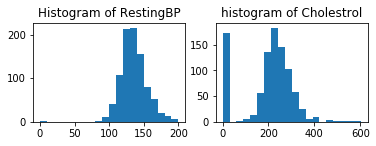

In [15]:
#Analyzing the numerica variables by through Histogram

plt.subplot(2,2,1)

plt.hist(df['RestingBP'], bins = 20)

plt.title('Histogram of RestingBP')

plt.subplot(2,2,2)
plt.hist(df['Cholesterol'],bins=20)

plt.title('histogram of Cholestrol')



Text(0.5, 1.0, 'histogram of Oldpeak')

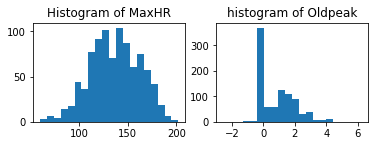

In [16]:
plt.subplot(2,2,3)

plt.hist(df['MaxHR'], bins = 20)

plt.title('Histogram of MaxHR')


plt.subplot(2,2,4)
plt.hist(df['Oldpeak'],bins=20)

plt.title('histogram of Oldpeak')

After ploting Histogram these features have some outliers,Skewness is obtained

In [17]:
df[['RestingBP','Cholesterol','MaxHR','Oldpeak']].describe()

,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000
mean,132.396514,198.799564,136.809368,0.887364
std,18.514154,109.384145,25.460334,1.066570
min,0.000000,0.000000,60.000000,-2.600000
25%,120.000000,173.250000,120.000000,0.000000
50%,130.000000,223.000000,138.000000,0.600000
75%,140.000000,267.000000,156.000000,1.500000
max,200.000000,603.000000,202.000000,6.200000


In [18]:
#using Z-Score method to handle outliers Zsore=(x-mean)/stadard deviation

#calculating Z-score of feature RestingBP

df['Zscore']=(df.RestingBP-df.RestingBP.mean())/df.RestingBP.std()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410685
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.490940
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129442
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302660
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.950812


In [19]:
df.shape

(918, 13)

In [20]:
df1=df[(df['Zscore']>-3)&(df['Zscore']<3)]

In [21]:
df1.shape

(910, 13)

In [22]:
df[(df['Zscore']>3)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0,3.111322
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1,3.651449
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1,3.651449
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1,3.651449
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1,3.111322
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1,3.651449
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1,3.219347


In [23]:
#calculating Z-score of 'Cholesterol'
df1['CH_Zscore']=(df1.Cholesterol-df1.Cholesterol.mean())/df1.Cholesterol.std()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore,CH_Zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410685,0.823475
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.490940,-0.175198
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129442,0.768502
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302660,0.136315
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.950812,-0.037766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.209697,0.594422
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.626736,-0.056090
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.129442,-0.624143
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.129442,0.337882


In [25]:
#filetering the rows they have CH_Zscore<3 std and CH_Zscore>3std
df1=df1[(df1['CH_Zscore']>-3)&(df1['CH_Zscore']<3)]
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore,CH_Zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410685,0.823475
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.490940,-0.175198
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129442,0.768502
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302660,0.136315
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.950812,-0.037766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.209697,0.594422
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.626736,-0.056090
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.129442,-0.624143
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.129442,0.337882


In [26]:
df1.shape

(907, 14)

In [27]:
#calculating Zscore of Oldpeak
df1['Ol_Zscore']=(df1.Oldpeak-df1['Oldpeak'].mean())/df1['Oldpeak'].std()
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore,CH_Zscore,Ol_Zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410685,0.823475,-0.830027
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.490940,-0.175198,0.109255
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129442,0.768502,-0.830027
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302660,0.136315,0.578896
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.950812,-0.037766,-0.830027


In [28]:
#remove the rows which having Ol_Zscore<3std and Old_Zscore>3std
df1=df1[(df1['Ol_Zscore']>-3)&(df1['Ol_Zscore']<3)]
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Zscore,CH_Zscore,Ol_Zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.410685,0.823475,-0.830027
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.490940,-0.175198,0.109255
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.129442,0.768502,-0.830027
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.302660,0.136315,0.578896
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.950812,-0.037766,-0.830027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-1.209697,0.594422,0.297111
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.626736,-0.056090,2.363532
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.129442,-0.624143,0.297111
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,-0.129442,0.337882,-0.830027


In [29]:
#remove the Zsore columns
df1.drop(['Zscore','CH_Zscore','Ol_Zscore'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
df1.shape

(900, 12)

## Categorical Encoding

In [37]:
df1.select_dtypes(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


## Using Label Encoding 

In [42]:
for feature in df1.select_dtypes(include='object'):
    print(df[feature].unique(),"--",feature)
    

['M' 'F'] -- Sex
['ATA' 'NAP' 'ASY' 'TA'] -- ChestPainType
['Normal' 'ST' 'LVH'] -- RestingECG
['N' 'Y'] -- ExerciseAngina
['Up' 'Flat' 'Down'] -- ST_Slope


df1.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df1.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df1.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

In [45]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [46]:
df1.shape

(900, 12)

## Using One Hot Encoding 

In [48]:
df1=pd.get_dummies(df1,drop_first=True)
df1.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0


In [49]:
df1.shape

(900, 14)

In [50]:
x=df1.drop(['HeartDisease'],axis=1)

y=df1['HeartDisease']

In [52]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0


In [53]:
x.shape

(900, 13)

In [54]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

### Applying StandardScalar

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
df_scaled=scaler.fit_transform(x)
df_scaled

array([[-1.42859937,  0.46558517,  0.85055001, ...,  2.0647416 ,
        -0.53452248, -0.22941573],
       [-0.47580769,  1.6349075 , -0.16584549, ..., -0.4843221 ,
         1.87082869, -0.22941573],
       [-1.7461966 , -0.11907599,  0.79460163, ...,  2.0647416 ,
        -0.53452248, -0.22941573],
       ...,
       [ 0.37111824, -0.11907599, -0.62275723, ..., -0.4843221 ,
        -0.53452248, -0.22941573],
       [ 0.37111824, -0.11907599,  0.35633935, ...,  2.0647416 ,
        -0.53452248, -0.22941573],
       [-1.64033085,  0.34865294, -0.21246914, ..., -0.4843221 ,
         1.87082869, -0.22941573]])

In [61]:
df_scaled[0]

array([-1.42859937,  0.46558517,  0.85055001, -0.54996382, -0.74438735,
        1.38141223, -0.8221786 , -0.85464583,  1.04354301,  0.51558005,
        2.0647416 , -0.53452248, -0.22941573])

In [64]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(df_scaled,y,test_size=0.30,random_state=20)

In [65]:
train_X.shape

(630, 13)

### Training model using Decision Tree 

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(random_state=0), train_X,train_Y, cv=5)
scores.mean()

0.7603174603174603

## Training model using Bagging with Decision Tree

In [69]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=0), 
    n_estimators=100, 
    max_samples=0.9, 
    oob_score=True,
    random_state=0
)

scores = cross_val_score(bag_model, train_X, train_Y, cv=5)
scores.mean()

0.8396825396825397

# Training model using Random Forest 

In [70]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), train_X, train_Y, cv=5)
scores.mean()

0.8555555555555555

RandomForest gives the better accuraccy

In [71]:
clf = RandomForestClassifier()
clf.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
clf.predict(train_X)

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,